In [61]:
import os
import torch
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

from conditional_rate_matching.configs.config_files import ExperimentFiles

from conditional_rate_matching.models.trainers.crm_trainer import CRMTrainer

from conditional_rate_matching.models.generative_models.crm import CRM
from conditional_rate_matching.configs.configs_classes.config_crm import CRMConfig,CRMTrainerConfig,BasicPipelineConfig

from conditional_rate_matching.models.metrics.metrics_utils import MetricsAvaliable

from conditional_rate_matching.models.trainers.call_all_trainers import call_trainer
from conditional_rate_matching.configs.configs_classes.config_crm import OptimalTransportSamplerConfig
from conditional_rate_matching.configs.experiments_configs.crm.crm_experiments_graph import experiment_comunity_small

# Set Config

In [5]:
config:CRMConfig = experiment_comunity_small()


config.trainer = CRMTrainerConfig(number_of_epochs=200,
                                  learning_rate=1e-3,
                                  metrics=[MetricsAvaliable.mse_histograms, 
                                           MetricsAvaliable.graphs_plot,
                                           MetricsAvaliable.marginal_binary_histograms],
                                max_test_size=100)

config.pipeline = BasicPipelineConfig(number_of_steps=100)

# Create a Model

In [6]:
crm = CRM(config=config)

# Train a Model

# ==================================================
# START OF TRAINING 
# ==================================================
# Current Model ************************************
tutorial
crm
None
# ==================================================
# Number of Epochs 200
# ==================================================


Epoch 200, Loss: 0.1732: 100%|██████████| 200/200 [00:17<00:00, 11.53it/s]
100it [00:00, 187.67it/s]


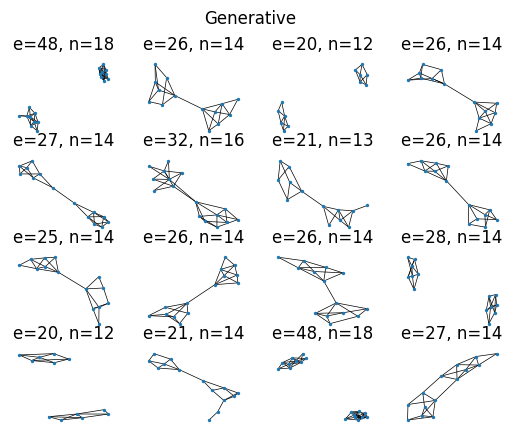

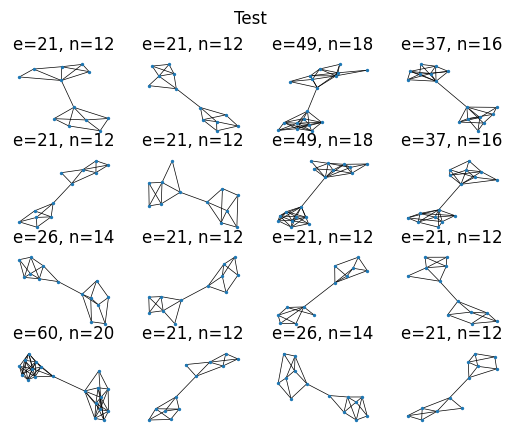

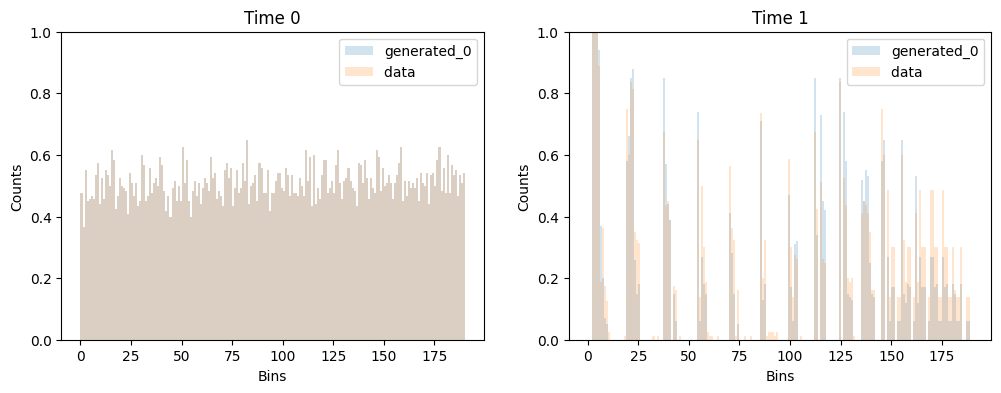

In [7]:
experiment_files = ExperimentFiles(experiment_name="crm",
                                   experiment_type="tutorial",
                                   experiment_indentifier=None)
crm_trainer = CRMTrainer(config, experiment_files) # TRAINER CREATES MODEL FROM CONFIG FILE
results_, all_metrics = crm_trainer.train()

# Read and Sample from a Model

In [8]:
crm_trained = CRM(experiment_dir=experiment_files.experiment_dir)
crm_trained.config.pipeline.number_of_steps = 1000
sample_x = crm_trained.pipeline(sample_size=10,train=False)

In [20]:
# IN THIS EXAMPLE CREATE FROM SAMPLE TO NETWORKX GRAPHS
graphs_sample = crm_trained.dataloader_1.sample_to_graph(sample_x)

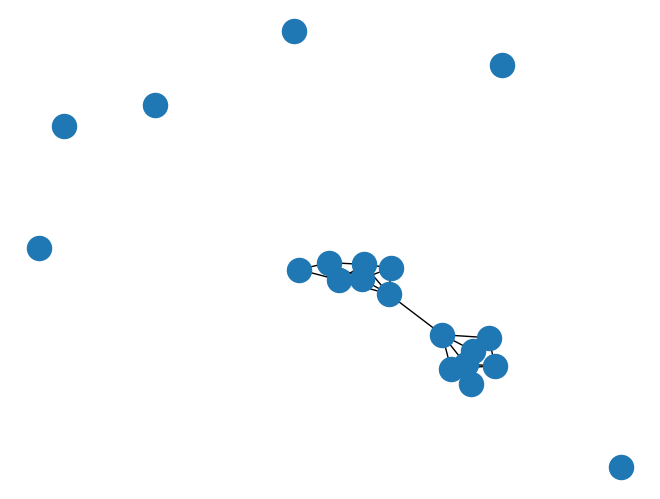

In [21]:
nx.draw(graphs_sample[6])

## Read results only (without model initialization)

In [58]:
experiment_files = ExperimentFiles(experiment_dir=experiment_files.experiment_dir)
results_ = experiment_files.load_results()

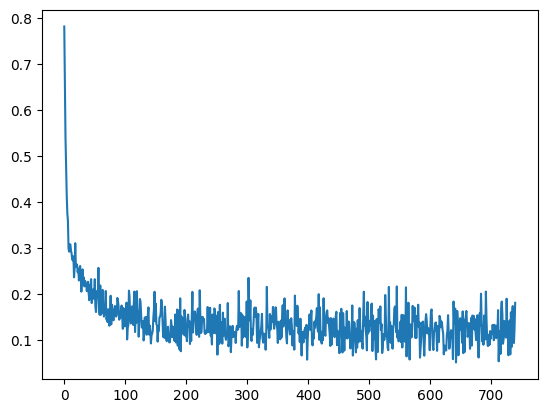

In [62]:
plt.plot(results_["all_training_loss"])

# Calculate a Metric Again

In [23]:
from conditional_rate_matching.models.metrics.metrics_utils import log_metrics, MetricsAvaliable
metrics_avaliable = MetricsAvaliable()

In [48]:
# number of samples requiered to calculate the test 
# this number should not be that big as the sample and paths are stored to perform the statistics
crm_trained.config.trainer.max_test_size = 100 
crm_trained.config.pipeline.number_of_steps = 100

In [55]:
metric_string = metrics_avaliable.mse_histograms
test_statistics = []
for i in range(10):
    metrics = log_metrics(crm_trained,all_metrics={},metrics_to_log={metric_string})
    print(metrics)
    test_statistics.append(metrics["mse_marginal_histograms"])
test_statistics = np.asarray(test_statistics)

0it [00:00, ?it/s]

100it [00:00, 212.10it/s]


{'mse_marginal_histograms': 0.006141578312963247}


100it [00:00, 225.82it/s]


{'mse_marginal_histograms': 0.007965789176523685}


100it [00:00, 219.05it/s]


{'mse_marginal_histograms': 0.0032431576400995255}


100it [00:00, 216.52it/s]


{'mse_marginal_histograms': 0.007401579525321722}


100it [00:00, 191.39it/s]


{'mse_marginal_histograms': 0.006663157604634762}


100it [00:00, 203.55it/s]


{'mse_marginal_histograms': 0.007688420824706554}


100it [00:00, 213.57it/s]


{'mse_marginal_histograms': 0.005719473585486412}


100it [00:00, 203.85it/s]


{'mse_marginal_histograms': 0.008649473078548908}


100it [00:00, 198.10it/s]


{'mse_marginal_histograms': 0.008363684639334679}


100it [00:00, 201.03it/s]

{'mse_marginal_histograms': 0.012508421204984188}


In [57]:
test_statistics.mean(),test_statistics.std()

(0.0074344735592603685, 0.0022629036602340867)